In [1]:
import pandas as pd 
import datetime
import numpy as np 
import yfinance as yf
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.svm import SVR

C:\Users\srini\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
today = date.today()
day_before = today - timedelta(days = 2)

In [3]:
def data_generation(ticker):
    ticker = yf.Ticker(ticker)
    df = ticker.history(start='2018-01-01', end=day_before)
    df = df.sort_values('Date')
    df.reset_index(inplace=True)
    df.set_index("Date", inplace=True)
    return df

In [4]:
def plot_ma(df):
    close_px = df['Close']
    mavg = close_px.rolling(window=60).mean()
    plt.figure(figsize = (12,6))
    close_px.plot(label='MSFT')
    mavg.plot(label='mavg')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

In [5]:
def get_date_df(df):
    dates_df = df.copy()
    dates_df = dates_df.reset_index()
    org_dates = dates_df['Date']
    dates_df['Date'] = dates_df['Date'].map(mdates.date2num)
    return dates_df

In [6]:
def model(df,dates_df,gamma_value):
    dates = dates_df['Date'].to_numpy()
    prices = df['Close'].to_numpy()
    dates = np.reshape(dates, (len(dates), 1))
    prices = np.reshape(prices, (len(prices), ))
    svr_rbf = SVR(kernel= 'rbf', C= 1e4, gamma= gamma_value)
    svr_rbf.fit(dates, prices)
    
    '''plt.figure(figsize = (12,6))
    plt.plot(dates, prices, color= 'black', label= 'Data')
    plt.plot(org_dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') 
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    #plt.show()'''
    
    current_date = dates_df.iloc[-1]["Date"] + 1
    res = svr_rbf.predict([[current_date]])
    return res

{'MSFT': array([208.60441792])}

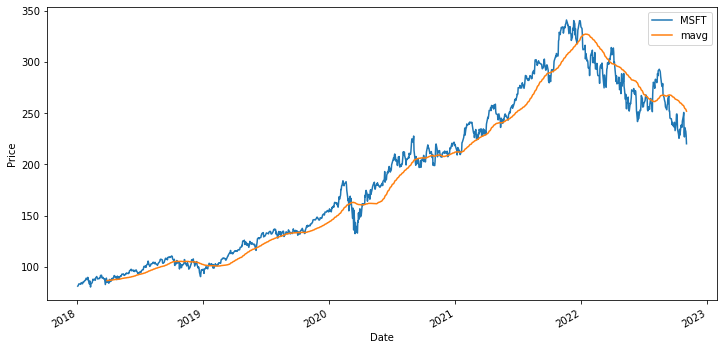

In [8]:
final_stocks = {"MSFT": 0.265}
result = {}
for i in final_stocks:
    ticker = yf.Ticker(i)
    data = ticker.history(start='2021-01-01', end=today)
    prev = (data.iloc[-1]["Close"])
    df = data_generation(i)
    plot_ma(df)
    dates_df = get_date_df(df)
    res = model(df,dates_df,final_stocks[i])
    result[i] = res
result